In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Consulto los datos de la acción
data = yf.download("GOOGL", start='2023-01-01')
df = pd.DataFrame(data)
df.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [17]:
# Defino dos decimales para los datos flotantes
pd.options.display.float_format = '{:.2f}'.format

In [18]:
# Extraigo los datos de cierre de la acciones para los datos de entrada (data_in) y salida (data_out).
data_in = df[['Close']]
data_out = df[['Close']]

# Los datos de entrada serán los cierres de la acciones desde el primer dato hasta el anteúltimo.
data_in_subset = data_in.iloc[:len(data_in)-1]
# Los datos de salida serán los cierres de las acciones desde el segundo hasta el último.
data_out_subset = data_out.iloc[1:]

# Con esto logro que el primer dato (data_in[0]) sea la entrada del segundo dato (data_out[1])

print(data_in)
print(data_out)
print(data_in_subset)
print(data_out_subset)

     Close
0    89.12
1    88.08
2    86.20
3    87.34
4    88.02
..     ...
202 136.50
203 138.81
204 125.61
205 122.28
206 122.17

[207 rows x 1 columns]
     Close
0    89.12
1    88.08
2    86.20
3    87.34
4    88.02
..     ...
202 136.50
203 138.81
204 125.61
205 122.28
206 122.17

[207 rows x 1 columns]
     Close
0    89.12
1    88.08
2    86.20
3    87.34
4    88.02
..     ...
201 135.60
202 136.50
203 138.81
204 125.61
205 122.28

[206 rows x 1 columns]
     Close
1    88.08
2    86.20
3    87.34
4    88.02
5    88.42
..     ...
202 136.50
203 138.81
204 125.61
205 122.28
206 122.17

[206 rows x 1 columns]


In [19]:
from sklearn.model_selection import train_test_split
# Realizamos el split de X e Y en los sets de entrenamiento (train) y test
X_train, X_test, y_train, y_test = train_test_split(data_in_subset, data_out_subset, test_size=0.20, random_state=1992)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Creación del modelo de regreción lineal
model = LinearRegression(fit_intercept=True)
# Entrenamientod el modelo
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Coeficiente del modelo (Sería el parámetro 'a' de la ecuación 'y = ax + b')
model.coef_

array([[0.99142131]])

In [23]:
# Intercepto del modelo (Sería el parámetro 'b' de la ecuación 'y = ax + b')
model.intercept_

array([1.25467266])

In [24]:
len(X_test)

42

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
# Realizamos la predicción con los X_test
y_pred = model.predict(X_test)

# Calculamos el Error Cuadrático Medio
mse = mean_squared_error(y_test, y_pred)

# Calculamos el Coeficiente de Determinación
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 6.401409973797007
R2: 0.9687593310388729


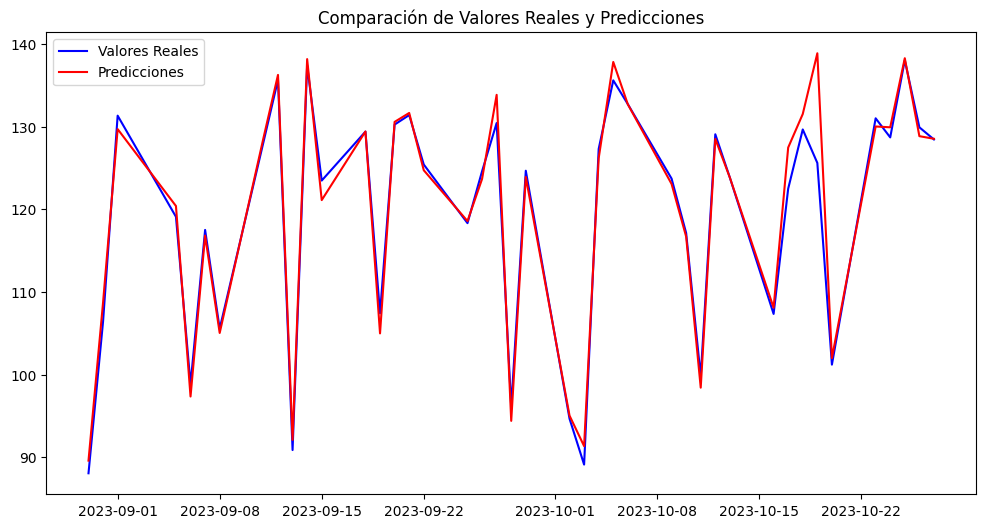

In [26]:
df_subset = df.iloc[-len(y_test):]

# Graficar Valores Reales y Predicciones
plt.figure(figsize=(12,6))
plt.plot(df_subset['Date'], y_test, label='Valores Reales', color='blue')
plt.plot(df_subset['Date'], y_pred, label='Predicciones', color='red')
plt.legend()
plt.title('Comparación de Valores Reales y Predicciones')
plt.show()

In [27]:
len(y_pred)

42

In [28]:
# Crear un DataFrame con los últimos 40 valores reales
cant_dataTest = len(y_pred)
df_test = df.iloc[-cant_dataTest:][['Date', 'Close']].copy()

# Crear un DataFrame para las predicciones
prediction = pd.DataFrame(y_pred, columns=['Predictions'])

# Asignar las predicciones al DataFrame df_test
df_test['Prediction'] = prediction['Predictions'].values

# Reiniciar el índice si es necesario
df_test.reset_index(drop=True, inplace=True)

# Calculo la diferencia entre los datos de cierre y predicciones
df_test['Diference'] = df_test['Close'] - df_test['Prediction']

# Mostrar el DataFrame
print(df_test)
print(f"Media de diferencia entre los datos de cierre y predicciones: {df_test['Diference'].mean()}")

         Date  Close  Prediction  Diference
0  2023-08-30 135.88       89.61      46.27
1  2023-08-31 136.17      108.74      27.43
2  2023-09-01 135.66      129.70       5.96
3  2023-09-05 135.77      120.40      15.37
4  2023-09-06 134.46       97.36      37.10
5  2023-09-07 135.26      116.82      18.44
6  2023-09-08 136.38      105.05      31.33
7  2023-09-11 136.92      128.60       8.32
8  2023-09-12 135.34      136.26      -0.92
9  2023-09-13 136.71       92.12      44.59
10 2023-09-14 138.10      138.17      -0.07
11 2023-09-15 137.40      121.12      16.28
12 2023-09-18 138.21      129.42       8.79
13 2023-09-19 138.04      105.00      33.04
14 2023-09-20 133.74      130.58       3.16
15 2023-09-21 130.44      131.66      -1.22
16 2023-09-22 130.25      124.73       5.52
17 2023-09-25 131.11      118.58      12.53
18 2023-09-26 128.57      123.68       4.89
19 2023-09-27 130.54      133.85      -3.31
20 2023-09-28 132.31       94.42      37.89
21 2023-09-29 130.86      123.91